## Predict the per capita income for year 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
df.describe()

,year,income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [4]:
df.corr()

,year,income
year,1.000000,0.943884
income,0.943884,1.000000


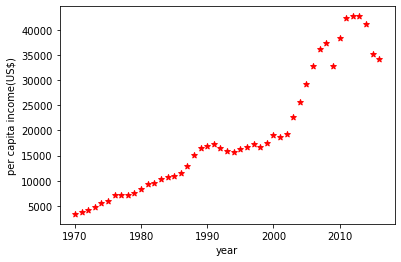

In [5]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income(US$)')
plt.scatter(df.year, df.income,color='red',marker='*')

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[["year"]], df.income)

LinearRegression()

In [7]:
reg.predict([[2020]])

C:\Users\nampa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

Linear regression uses the formula y = m * c + b where m is slope and b is intercept

In [8]:
reg.coef_

array([828.46507522])

In [9]:
reg.intercept_

-1632210.7578554575

In [10]:
2020 * 828.46507522 + (-1632210.7578554575) # Apply (y = m * c + b)

41288.694088942604

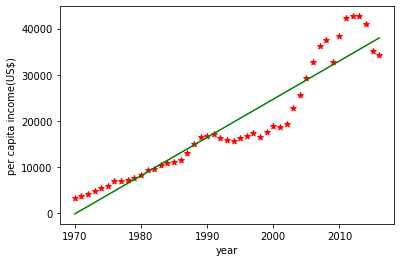

In [11]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income(US$)')
plt.scatter(df.year, df.income,color='red',marker='*')
plt.plot(df.year, reg.predict(df[['year']]), color = 'green')

## Predict the salary

In [12]:
d = pd.read_csv("hiring.csv")
d.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [13]:
d.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [14]:
d.experience = d.experience.fillna("zero")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [16]:
from word2number import w2n
d.experience = d.experience.apply(w2n.word_to_num)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(d)

SimpleImputer(strategy='median')

In [18]:
X = imputer.transform(d)

In [19]:
sal_df = pd.DataFrame(X, columns = d.columns)

In [20]:
sal_df.rename(columns = {'salary($)':'salary'}, inplace = True)

## Correlations

In [21]:
corr_matrix = sal_df.corr()

In [22]:
corr_matrix["salary"].sort_values(ascending = False)

salary                        1.000000
experience                    0.908017
interview_score(out of 10)    0.037820
test_score(out of 10)         0.009965
Name: salary, dtype: float64

array([[<AxesSubplot:xlabel='salary', ylabel='salary'>,
        <AxesSubplot:xlabel='experience', ylabel='salary'>,
        <AxesSubplot:xlabel='test_score(out of 10)', ylabel='salary'>,
        <AxesSubplot:xlabel='interview_score(out of 10)', ylabel='salary'>],
       [<AxesSubplot:xlabel='salary', ylabel='experience'>,
        <AxesSubplot:xlabel='experience', ylabel='experience'>,
        <AxesSubplot:xlabel='test_score(out of 10)', ylabel='experience'>,
        <AxesSubplot:xlabel='interview_score(out of 10)', ylabel='experience'>],
       [<AxesSubplot:xlabel='salary', ylabel='test_score(out of 10)'>,
        <AxesSubplot:xlabel='experience', ylabel='test_score(out of 10)'>,
        <AxesSubplot:xlabel='test_score(out of 10)', ylabel='test_score(out of 10)'>,
        <AxesSubplot:xlabel='interview_score(out of 10)', ylabel='test_score(out of 10)'>],
       [<AxesSubplot:xlabel='salary', ylabel='interview_score(out of 10)'>,
        <AxesSubplot:xlabel='experience', ylabel='interv

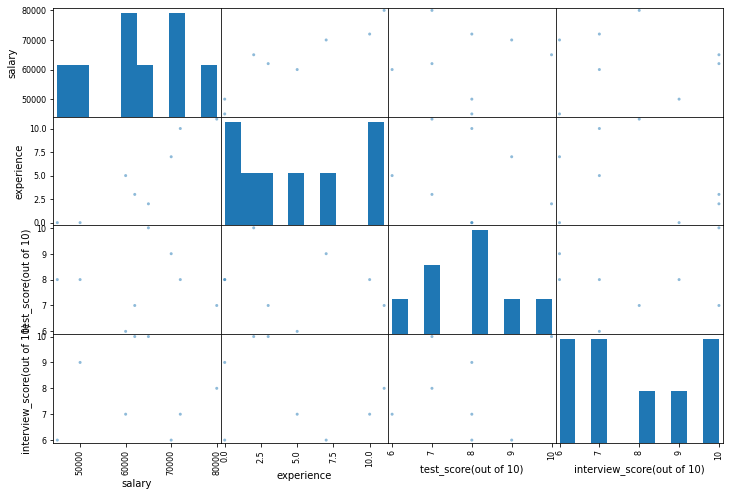

In [23]:
from pandas.plotting import scatter_matrix
atr = ["salary", "experience", "test_score(out of 10)", "interview_score(out of 10)"]
scatter_matrix(sal_df[atr], figsize = (12, 8))

In [24]:
reg1 = linear_model.LinearRegression()
reg1.fit(sal_df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]], sal_df.salary)

LinearRegression()

In [25]:
reg1.predict([[2, 9, 6]])

C:\Users\nampa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [26]:
reg1.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [27]:
reg1.intercept_

17737.263464337688

In [28]:
(2812.95487627 * 2) + (1845.70596798 * 9) + (2205.24017467 * 6) + 17737.263464337688

53205.96797671769

In [29]:
reg1.predict([[12, 10, 10]])

C:\Users\nampa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [32]:
import joblib as jb

In [35]:
jb.dump(reg1, 'model_joblib')

['model_joblib']

In [36]:
mj = jb.load('model_joblib')

In [37]:
mj.predict([[2, 9, 6]])

C:\Users\nampa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [38]:
mj.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [39]:
mj.intercept_

17737.263464337688